# SQLAlchemy, Sqlite, and Dates

## Setup

In [1]:
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite", echo=False)
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [5]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [6]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [7]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


## Reflect and query dates

In [9]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
meas = Base.classes.measurement
stat = Base.classes.station

In [10]:
session = Session(engine)

## Analysis

Design a query to retrieve the last 12 months of precipitation data.
Select only the date and prcp values.
Load the query results into a Pandas DataFrame and set the index to the date column.
Sort the DataFrame values by date.
Plot the results using the DataFrame plot method.

In [11]:
#get last date in measurements and go back (subtract one year (365 days))
import datetime as dt
dtstart = dt.datetime(2017,8,23)
dtstart = dtstart - dt.timedelta(days=365)
dtstart


datetime.datetime(2016, 8, 23, 0, 0)

In [12]:
dates = session.query(meas).filter(meas.date >= dtstart).all()
for date in dates:
    print(f"date: {meas.date}, prec: {meas.prcp}")

date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measurement.date, prec: measurement.prcp
date: measure

In [13]:
sel = [meas.date, 
       meas.tobs, meas.station]
mth = session.query(*sel)
       
for j in mth:
    print(j)


df_mth = pd.DataFrame(mth, columns=['date', 'tobs', 'station'])
df_mth.head(10)


('2010-01-01', 65.0, 'USC00519397')
('2010-01-02', 63.0, 'USC00519397')
('2010-01-03', 74.0, 'USC00519397')
('2010-01-04', 76.0, 'USC00519397')
('2010-01-06', 73.0, 'USC00519397')
('2010-01-07', 70.0, 'USC00519397')
('2010-01-08', 64.0, 'USC00519397')
('2010-01-09', 68.0, 'USC00519397')
('2010-01-10', 73.0, 'USC00519397')
('2010-01-11', 64.0, 'USC00519397')
('2010-01-12', 61.0, 'USC00519397')
('2010-01-14', 66.0, 'USC00519397')
('2010-01-15', 65.0, 'USC00519397')
('2010-01-16', 68.0, 'USC00519397')
('2010-01-17', 64.0, 'USC00519397')
('2010-01-18', 72.0, 'USC00519397')
('2010-01-19', 66.0, 'USC00519397')
('2010-01-20', 66.0, 'USC00519397')
('2010-01-21', 69.0, 'USC00519397')
('2010-01-22', 67.0, 'USC00519397')
('2010-01-23', 67.0, 'USC00519397')
('2010-01-24', 71.0, 'USC00519397')
('2010-01-25', 67.0, 'USC00519397')
('2010-01-26', 76.0, 'USC00519397')
('2010-01-27', 68.0, 'USC00519397')
('2010-01-28', 72.0, 'USC00519397')
('2010-01-30', 70.0, 'USC00519397')
('2010-01-31', 67.0, 'USC005

('2011-03-19', 73.0, 'USC00513117')
('2011-03-20', 73.0, 'USC00513117')
('2011-03-21', 72.0, 'USC00513117')
('2011-03-22', 70.0, 'USC00513117')
('2011-03-23', 72.0, 'USC00513117')
('2011-03-24', 72.0, 'USC00513117')
('2011-03-25', 72.0, 'USC00513117')
('2011-03-26', 72.0, 'USC00513117')
('2011-03-27', 72.0, 'USC00513117')
('2011-03-28', 72.0, 'USC00513117')
('2011-03-29', 72.0, 'USC00513117')
('2011-03-30', 73.0, 'USC00513117')
('2011-03-31', 72.0, 'USC00513117')
('2011-04-01', 72.0, 'USC00513117')
('2011-04-02', 72.0, 'USC00513117')
('2011-04-03', 70.0, 'USC00513117')
('2011-04-04', 73.0, 'USC00513117')
('2011-04-05', 71.0, 'USC00513117')
('2011-04-06', 70.0, 'USC00513117')
('2011-04-07', 67.0, 'USC00513117')
('2011-04-08', 68.0, 'USC00513117')
('2011-04-09', 74.0, 'USC00513117')
('2011-04-10', 74.0, 'USC00513117')
('2011-04-11', 73.0, 'USC00513117')
('2011-04-12', 73.0, 'USC00513117')
('2011-04-13', 67.0, 'USC00513117')
('2011-04-14', 73.0, 'USC00513117')
('2011-04-15', 69.0, 'USC005

('2014-06-10', 73.0, 'USC00514830')
('2014-06-11', 76.0, 'USC00514830')
('2014-06-12', 78.0, 'USC00514830')
('2014-06-13', 77.0, 'USC00514830')
('2014-06-14', 78.0, 'USC00514830')
('2014-06-16', 76.0, 'USC00514830')
('2014-06-17', 75.0, 'USC00514830')
('2014-06-18', 76.0, 'USC00514830')
('2014-06-19', 77.0, 'USC00514830')
('2014-06-20', 74.0, 'USC00514830')
('2014-06-21', 78.0, 'USC00514830')
('2014-06-23', 77.0, 'USC00514830')
('2014-06-24', 77.0, 'USC00514830')
('2014-06-25', 74.0, 'USC00514830')
('2014-06-26', 74.0, 'USC00514830')
('2014-06-27', 78.0, 'USC00514830')
('2014-06-29', 79.0, 'USC00514830')
('2014-06-30', 79.0, 'USC00514830')
('2014-07-01', 76.0, 'USC00514830')
('2014-07-02', 79.0, 'USC00514830')
('2014-07-03', 78.0, 'USC00514830')
('2014-07-04', 77.0, 'USC00514830')
('2014-07-05', 78.0, 'USC00514830')
('2014-07-06', 79.0, 'USC00514830')
('2014-07-07', 77.0, 'USC00514830')
('2014-07-08', 76.0, 'USC00514830')
('2014-07-09', 78.0, 'USC00514830')
('2014-07-10', 78.0, 'USC005

('2011-10-13', 80.0, 'USC00519523')
('2011-10-14', 79.0, 'USC00519523')
('2011-10-15', 79.0, 'USC00519523')
('2011-10-16', 79.0, 'USC00519523')
('2011-10-17', 70.0, 'USC00519523')
('2011-10-18', 72.0, 'USC00519523')
('2011-10-19', 68.0, 'USC00519523')
('2011-10-20', 78.0, 'USC00519523')
('2011-10-21', 77.0, 'USC00519523')
('2011-10-22', 76.0, 'USC00519523')
('2011-10-23', 77.0, 'USC00519523')
('2011-10-24', 73.0, 'USC00519523')
('2011-10-25', 77.0, 'USC00519523')
('2011-10-26', 79.0, 'USC00519523')
('2011-10-27', 73.0, 'USC00519523')
('2011-10-28', 76.0, 'USC00519523')
('2011-10-29', 80.0, 'USC00519523')
('2011-10-30', 72.0, 'USC00519523')
('2011-10-31', 75.0, 'USC00519523')
('2011-11-01', 74.0, 'USC00519523')
('2011-11-02', 73.0, 'USC00519523')
('2011-11-03', 78.0, 'USC00519523')
('2011-11-04', 73.0, 'USC00519523')
('2011-11-05', 78.0, 'USC00519523')
('2011-11-06', 81.0, 'USC00519523')
('2011-11-07', 75.0, 'USC00519523')
('2011-11-08', 74.0, 'USC00519523')
('2011-11-09', 74.0, 'USC005

('2014-01-20', 65.0, 'USC00519281')
('2014-01-21', 71.0, 'USC00519281')
('2014-01-22', 68.0, 'USC00519281')
('2014-01-23', 58.0, 'USC00519281')
('2014-01-24', 58.0, 'USC00519281')
('2014-01-25', 73.0, 'USC00519281')
('2014-01-26', 75.0, 'USC00519281')
('2014-01-27', 66.0, 'USC00519281')
('2014-01-28', 66.0, 'USC00519281')
('2014-01-29', 67.0, 'USC00519281')
('2014-01-30', 64.0, 'USC00519281')
('2014-01-31', 65.0, 'USC00519281')
('2014-02-01', 70.0, 'USC00519281')
('2014-02-02', 66.0, 'USC00519281')
('2014-02-03', 66.0, 'USC00519281')
('2014-02-04', 66.0, 'USC00519281')
('2014-02-05', 67.0, 'USC00519281')
('2014-02-06', 70.0, 'USC00519281')
('2014-02-07', 68.0, 'USC00519281')
('2014-02-08', 67.0, 'USC00519281')
('2014-02-09', 72.0, 'USC00519281')
('2014-02-10', 69.0, 'USC00519281')
('2014-02-11', 62.0, 'USC00519281')
('2014-02-12', 66.0, 'USC00519281')
('2014-02-13', 66.0, 'USC00519281')
('2014-02-14', 71.0, 'USC00519281')
('2014-02-15', 71.0, 'USC00519281')
('2014-02-16', 71.0, 'USC005

('2012-01-30', 66.0, 'USC00516128')
('2012-01-31', 67.0, 'USC00516128')
('2012-02-01', 66.0, 'USC00516128')
('2012-02-02', 72.0, 'USC00516128')
('2012-02-03', 75.0, 'USC00516128')
('2012-02-04', 61.0, 'USC00516128')
('2012-02-05', 66.0, 'USC00516128')
('2012-02-06', 69.0, 'USC00516128')
('2012-02-07', 70.0, 'USC00516128')
('2012-02-08', 66.0, 'USC00516128')
('2012-02-09', 66.0, 'USC00516128')
('2012-02-10', 68.0, 'USC00516128')
('2012-02-11', 69.0, 'USC00516128')
('2012-02-12', 69.0, 'USC00516128')
('2012-02-13', 67.0, 'USC00516128')
('2012-02-14', 71.0, 'USC00516128')
('2012-02-15', 70.0, 'USC00516128')
('2012-02-16', 70.0, 'USC00516128')
('2012-02-17', 69.0, 'USC00516128')
('2012-02-18', 69.0, 'USC00516128')
('2012-02-19', 72.0, 'USC00516128')
('2012-02-20', 69.0, 'USC00516128')
('2012-02-21', 70.0, 'USC00516128')
('2012-02-22', 70.0, 'USC00516128')
('2012-02-23', 67.0, 'USC00516128')
('2012-02-24', 74.0, 'USC00516128')
('2012-02-25', 64.0, 'USC00516128')
('2012-02-26', 71.0, 'USC005

,date,tobs,station
0,2010-01-01,65.0,USC00519397
1,2010-01-02,63.0,USC00519397
2,2010-01-03,74.0,USC00519397
3,2010-01-04,76.0,USC00519397
4,2010-01-06,73.0,USC00519397
5,2010-01-07,70.0,USC00519397
6,2010-01-08,64.0,USC00519397
7,2010-01-09,68.0,USC00519397
8,2010-01-10,73.0,USC00519397
9,2010-01-11,64.0,USC00519397


In [14]:
#query precipitation for period ONE YEAR from last date. Include Station (for future merge) ORDER BY Date
sel = [meas.date, 
       meas.prcp, meas.station]
precip = session.query(*sel).\
    filter(meas.date >= dtstart).\
    group_by(meas.date).\
    order_by(meas.date).all()

precip

[('2016-08-24', 0.08, 'USC00519397'),
 ('2016-08-25', 0.08, 'USC00519397'),
 ('2016-08-26', 0.0, 'USC00519397'),
 ('2016-08-27', 0.0, 'USC00519397'),
 ('2016-08-28', 0.01, 'USC00519397'),
 ('2016-08-29', 0.0, 'USC00519397'),
 ('2016-08-30', 0.0, 'USC00519397'),
 ('2016-08-31', 0.13, 'USC00519397'),
 ('2016-09-01', 0.0, 'USC00519397'),
 ('2016-09-02', 0.0, 'USC00519397'),
 ('2016-09-03', 0.0, 'USC00519397'),
 ('2016-09-04', 0.03, 'USC00519397'),
 ('2016-09-05', None, 'USC00519397'),
 ('2016-09-06', None, 'USC00519397'),
 ('2016-09-07', 0.05, 'USC00519397'),
 ('2016-09-08', 0.0, 'USC00519397'),
 ('2016-09-09', 0.03, 'USC00519397'),
 ('2016-09-10', 0.0, 'USC00519397'),
 ('2016-09-11', 0.05, 'USC00519397'),
 ('2016-09-12', 0.0, 'USC00519397'),
 ('2016-09-13', 0.02, 'USC00519397'),
 ('2016-09-14', 1.32, 'USC00519397'),
 ('2016-09-15', 0.42, 'USC00519397'),
 ('2016-09-16', 0.06, 'USC00519397'),
 ('2016-09-17', 0.05, 'USC00519397'),
 ('2016-09-18', 0.0, 'USC00519397'),
 ('2016-09-19', 0.0, 'U

In [15]:
#query precipitation for period ONE YEAR from last date. Include Station and TOBS ORDER BY Date
sel = [meas.date, 
       meas.prcp, meas.station, meas.tobs]
measurements = session.query(*sel).\
    filter(meas.date >= dtstart).\
    group_by(meas.date).\
    order_by(meas.date).all()

measurements

[('2016-08-24', 0.08, 'USC00519397', 79.0),
 ('2016-08-25', 0.08, 'USC00519397', 80.0),
 ('2016-08-26', 0.0, 'USC00519397', 79.0),
 ('2016-08-27', 0.0, 'USC00519397', 77.0),
 ('2016-08-28', 0.01, 'USC00519397', 78.0),
 ('2016-08-29', 0.0, 'USC00519397', 78.0),
 ('2016-08-30', 0.0, 'USC00519397', 79.0),
 ('2016-08-31', 0.13, 'USC00519397', 80.0),
 ('2016-09-01', 0.0, 'USC00519397', 81.0),
 ('2016-09-02', 0.0, 'USC00519397', 80.0),
 ('2016-09-03', 0.0, 'USC00519397', 79.0),
 ('2016-09-04', 0.03, 'USC00519397', 75.0),
 ('2016-09-05', None, 'USC00519397', 79.0),
 ('2016-09-06', None, 'USC00519397', 76.0),
 ('2016-09-07', 0.05, 'USC00519397', 76.0),
 ('2016-09-08', 0.0, 'USC00519397', 80.0),
 ('2016-09-09', 0.03, 'USC00519397', 79.0),
 ('2016-09-10', 0.0, 'USC00519397', 78.0),
 ('2016-09-11', 0.05, 'USC00519397', 76.0),
 ('2016-09-12', 0.0, 'USC00519397', 78.0),
 ('2016-09-13', 0.02, 'USC00519397', 78.0),
 ('2016-09-14', 1.32, 'USC00519397', 75.0),
 ('2016-09-15', 0.42, 'USC00519397', 79.0)

In [25]:
#query STATIONS. Include Station and TOBS ORDER BY Date
sel = [stat.station, 
       stat.name, stat.latitude, stat.longitude, stat.elevation]
stations = session.query(*sel).\
    group_by(stat.station).\
    order_by(stat.station).all()

stations



[('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5)]

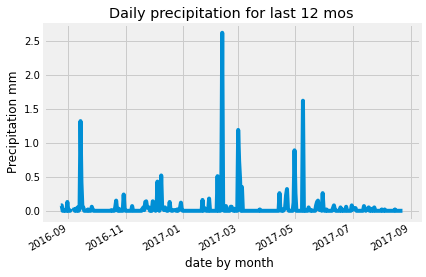

In [68]:
# Plot the Results in a Matplotlib bar chart
dfm = pd.DataFrame(precip, columns=['date', 'precip', 'station'])
dfmx = dfm
dfmx['month'] = pd.DatetimeIndex(dfmx['date']).month
dfmx['year'] = pd.DatetimeIndex(dfmx['date']).year
dfmx

dfmx['date'] = pd.to_datetime(dfmx['date'])
dfmx['mth_yr'] = dfmx['date'].apply(lambda x: x.strftime('%B-%Y')) 

from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

myDates = dfmx['date']
myValues = dfm['precip']
fig, ax = plt.subplots()
ax.plot(myDates,myValues)

myFmt = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()
plt.savefig('Bar Chart Precipitation last 12 months.png')
plt.title("Daily precipitation for last 12 mos")
plt.xlabel('date by month ')
plt.ylabel('Precipitation mm')
plt.show()

#dfmx.sort_values(by=['year', 'month'])
#dfmx.groupby(['mth_yr']).mean()


#dfm.set_index('date', inplace=True)
#dfmx.plot.bar(rot = 90)
#plt.tight_layout()
#plt.show()



In [20]:
#last 12 months TOBS with prcp and station
dfmi = pd.DataFrame(measurements, columns=['date', 'prcp', 'station','tobs'])

dfmi

,date,prcp,station,tobs
0,2016-08-24,0.08,USC00519397,79.0
1,2016-08-25,0.08,USC00519397,80.0
2,2016-08-26,0.00,USC00519397,79.0
3,2016-08-27,0.00,USC00519397,77.0
4,2016-08-28,0.01,USC00519397,78.0
...,...,...,...,...
360,2017-08-19,0.00,USC00519397,79.0
361,2017-08-20,0.00,USC00519397,81.0
362,2017-08-21,0.00,USC00519397,81.0
363,2017-08-22,0.00,USC00519397,82.0


### Create DF's of measurements and stations

In [21]:
dfs = pd.DataFrame(stations, columns=['station', 'name', 'lat', 'lon','elev'])

print(dfs)




       station                                    name       lat        lon  \
0  USC00511918       HONOLULU OBSERVATORY 702.2, HI US  21.31520 -157.99920   
1  USC00513117                    KANEOHE 838.1, HI US  21.42340 -157.80150   
2  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US  21.52130 -157.83740   
3  USC00516128            MANOA LYON ARBO 785.2, HI US  21.33310 -157.80250   
4  USC00517948                       PEARL CITY, HI US  21.39340 -157.97510   
5  USC00518838              UPPER WAHIAWA 874.3, HI US  21.49920 -158.01110   
6  USC00519281                     WAIHEE 837.5, HI US  21.45167 -157.84889   
7  USC00519397                    WAIKIKI 717.2, HI US  21.27160 -157.81680   
8  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US  21.33556 -157.71139   

    elev  
0    0.9  
1   14.6  
2    7.0  
3  152.4  
4   11.9  
5  306.6  
6   32.9  
7    3.0  
8   19.5  


In [22]:
dfmerge = pd.merge(dfs, dfmi, on="station")
dfmerge.set_index('date', inplace=True)


In [23]:
#Query to compute active stations by count
x=session.query(meas.station, func.count(meas.station)).\
    group_by(meas.station).\
    order_by(func.count(meas.station).desc()).all()

for x in x:
    print (x)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [24]:
#Query
x=session.query(meas.date, meas.station, meas.tobs, func.count(meas.station)).\
    filter(meas.date >= dtstart).\
    group_by(meas.station).\
    order_by(func.count(meas.station).desc()).\
    limit(1).\
    all()
for x in x:
    print (x)
    

print(x.station)
max_station = x.station
#y = session.query(meas.date, meas.prcp, meas.station, func.count(meas.station)).\
    #filter(meas.date >= dtstart).\
    #filter(func.count(meas.station >=1000).\
    #group_by(meas.station).\
    #order_by(func.count(meas.station).desc()).all()
    
    #order_by(func.count(meas.station).desc()).\
    #limit(1).\
    #all()
       



('2016-08-24', 'USC00519397', 79.0, 360)
USC00519397


In [25]:
#get tobs data for most active station in last year.
lsttobs=[]
f=session.query(meas.tobs, meas.station, meas.date).\
    filter(meas.station == max_station).\
    filter(meas.date >= dtstart).\
    all()
for f in f:
    print (f)
    lsttobs.append(f.tobs)
print(lsttobs)

(79.0, 'USC00519397', '2016-08-24')
(80.0, 'USC00519397', '2016-08-25')
(79.0, 'USC00519397', '2016-08-26')
(77.0, 'USC00519397', '2016-08-27')
(78.0, 'USC00519397', '2016-08-28')
(78.0, 'USC00519397', '2016-08-29')
(79.0, 'USC00519397', '2016-08-30')
(80.0, 'USC00519397', '2016-08-31')
(81.0, 'USC00519397', '2016-09-01')
(80.0, 'USC00519397', '2016-09-02')
(79.0, 'USC00519397', '2016-09-03')
(75.0, 'USC00519397', '2016-09-04')
(79.0, 'USC00519397', '2016-09-05')
(76.0, 'USC00519397', '2016-09-06')
(76.0, 'USC00519397', '2016-09-07')
(80.0, 'USC00519397', '2016-09-08')
(79.0, 'USC00519397', '2016-09-09')
(78.0, 'USC00519397', '2016-09-10')
(76.0, 'USC00519397', '2016-09-11')
(78.0, 'USC00519397', '2016-09-12')
(78.0, 'USC00519397', '2016-09-13')
(75.0, 'USC00519397', '2016-09-14')
(79.0, 'USC00519397', '2016-09-15')
(80.0, 'USC00519397', '2016-09-16')
(79.0, 'USC00519397', '2016-09-17')
(81.0, 'USC00519397', '2016-09-18')
(77.0, 'USC00519397', '2016-09-19')
(77.0, 'USC00519397', '2016-

In [26]:
# get the station name
s=session.query(stat.station, stat.name).\
    filter(stat.station == max_station).\
    all()
for s in s:
    print(s)
s.name
maxname = s.name

('USC00519397', 'WAIKIKI 717.2, HI US')


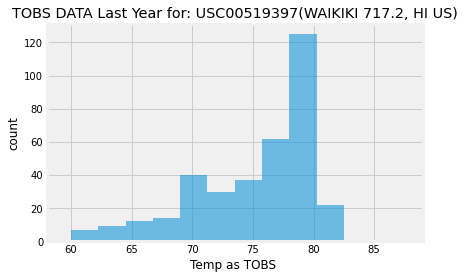

In [93]:
import numpy as np
import random
from matplotlib import pyplot as plt

data = lsttobs

# fixed bin size
bins = 12

plt.xlim([min(data)-2, max(data)+2])

plt.hist(data, bins=bins, alpha=0.55)
plt.title('TOBS DATA Last Year for: ' + max_station +"(" + maxname +")")
plt.xlabel('Temp as TOBS ')
plt.ylabel('count')
plt.savefig('Histogram Most Active Station.png')
plt.show()


In [28]:
df_mth['month'] = pd.DatetimeIndex(df_mth['date']).month
df_mth

,date,tobs,station,month
0,2010-01-01,65.0,USC00519397,1
1,2010-01-02,63.0,USC00519397,1
2,2010-01-03,74.0,USC00519397,1
3,2010-01-04,76.0,USC00519397,1
4,2010-01-06,73.0,USC00519397,1
...,...,...,...,...
19545,2017-08-19,71.0,USC00516128,8
19546,2017-08-20,78.0,USC00516128,8
19547,2017-08-21,76.0,USC00516128,8
19548,2017-08-22,76.0,USC00516128,8


In [29]:
dfdec = df_mth[df_mth['month'] == 12]

dfjun = df_mth[df_mth['month'] == 6]
print(dfjun.head(10))


           date  tobs      station  month
133  2010-06-01  78.0  USC00519397      6
134  2010-06-02  76.0  USC00519397      6
135  2010-06-03  78.0  USC00519397      6
136  2010-06-04  76.0  USC00519397      6
137  2010-06-05  77.0  USC00519397      6
138  2010-06-06  78.0  USC00519397      6
139  2010-06-07  77.0  USC00519397      6
140  2010-06-08  78.0  USC00519397      6
141  2010-06-09  78.0  USC00519397      6
142  2010-06-10  79.0  USC00519397      6


In [30]:
#JUn Avg by station
jun_station = dfjun.groupby("station")
junavg = jun_station["tobs"].mean()
junavg.head()

station
USC00511918    74.139394
USC00513117    74.050847
USC00514830    76.005376
USC00516128    71.937220
USC00517948    76.655405
Name: tobs, dtype: float64

In [31]:
#Dec Avgs by Station
dec_station = dfdec.groupby("station")
decavg = dec_station["tobs"].mean()
decavg.head()

station
USC00511918    69.684211
USC00513117    71.069444
USC00514830    73.224719
USC00516128    69.291262
USC00517948    71.834862
Name: tobs, dtype: float64

In [32]:
#Pair the averages by station for a true "Paired-T" test
dfjundec = pd.merge(decavg, junavg, on="station")

dfjundec.rename(columns={'tobs_x':'Dec',
                          'tobs_y':'Jun',
                          }, 
                 inplace=True)
dfjundec

,Dec,Jun
station,,
USC00511918,69.684211,74.139394
USC00513117,71.069444,74.050847
USC00514830,73.224719,76.005376
USC00516128,69.291262,71.937220
USC00517948,71.834862,76.655405
USC00518838,72.421053,73.394737
USC00519281,69.903226,73.271186
USC00519397,71.109524,77.559322
USC00519523,72.433333,76.668103


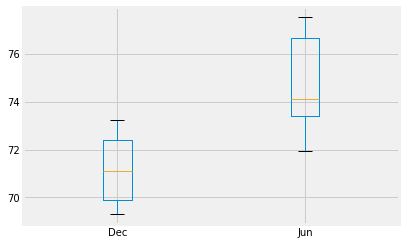

In [92]:
#plot box plots


from scipy import stats
import matplotlib.pyplot as plt

dfjundec[['Dec', 'Jun']].plot(kind='box')
# This saves the plot as a png file
plt.savefig('boxplot_Mean Dec v June.png')




(0.9419207572937012, 0.602258026599884)

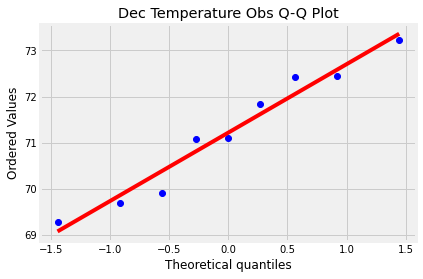

In [90]:
#paired t test - is there a difference in months (paired on station)
#check for normality:
stats.probplot(dfjundec['Dec'], plot= plt)
plt.title('Dec Temperature Obs Q-Q Plot')
plt.savefig('December temp Prob Plot.png')
stats.shapiro(dfjundec['Dec'])

(0.9325559735298157, 0.5060582756996155)

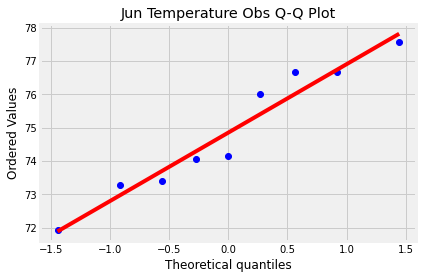

In [91]:
#paired t test - is there a difference in months (paired on station)
#check for normality:
stats.probplot(dfjundec['Jun'], plot= plt)
plt.title('Jun Temperature Obs Q-Q Plot')
plt.savefig('June temp Prob Plot.png')
stats.shapiro(dfjundec['Jun'])

In [36]:
#with p values much greater than 0.05 in both we conclude the normality assumption is valid.
stats.ttest_rel(dfjundec['Jun'], dfjundec['Dec'])

Ttest_relResult(statistic=6.95696617044294, pvalue=0.00011759380231523222)

In [37]:
#get the trip date one week of vacation to HI - go back one year
dtgo = dtstart + dt.timedelta(days=400)
dtback = dtgo + dt.timedelta(days = 7)
dtback
dtminus365 = dtgo - dt.timedelta(days = 365)
dtminus365
dtweek = dtminus365 + dt.timedelta(days = 7)


In [38]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(meas.tobs), func.avg(meas.tobs), func.max(meas.tobs)).\
           filter(meas.date >= start_date).filter(meas.date <= end_date).all()




print(calc_temps(dtminus365, dtweek))

dttext = str(dtminus365)

[(73.0, 78.25531914893617, 82.0)]


In [39]:
z= session.query(func.min(meas.tobs), func.avg(meas.tobs), func.max(meas.tobs)).\
    filter(meas.date >= dtminus365).filter(meas.date <= dtweek).all()




In [40]:
tmin = np.min(z)
tavg = np.mean(z)
tmax = np.max(z)
tdelta = tmax-tmin
tdelta
tmin
tmax

82.0

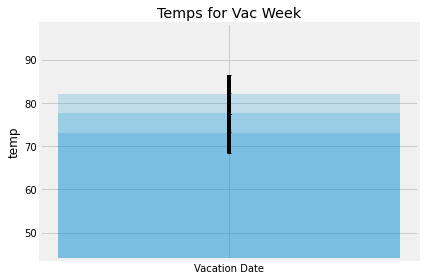

In [89]:
error = tdelta/2
data = [tmin,tavg,tmax]
xlab = ['Vacation Date']
x_pos = np.arange(len(xlab))
fig, ax = plt.subplots()
ax.bar(x_pos,data, yerr=error, align='center', alpha=0.2, ecolor='black', capsize=2)
ax.set_ylabel('temp')
ax.set_xticks(x_pos)
ax.set_xticklabels(xlab)
ax.set_title('Temps for Vac Week')
ax.yaxis.grid(True)
ax.set_ylim([0.6*tmin,1.20*tmax])

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_temp_with_error_bars.png')
plt.show()

In [83]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

lstdaynorm=[]
lstdates=['09-26','09-27','09-28','09-29','09-30']
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [meas.date,func.min(meas.tobs), func.avg(meas.tobs), func.max(meas.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", meas.date) == date).all()
    
#my_dict = collection.defaultdict(list)
for i in lstdates:    
    print(i)
    dn=daily_normals(i)
    print(dn)
    lstdaynorm.append(dn)
    #my_dict[i].append(dn)

#my_dict = dict(my_dict)
        
    
    

print(lstdaynorm)

09-26
[('2014-09-26', 66.0, 75.64, 85.0)]
09-27
[('2010-09-27', 68.0, 75.64, 83.0)]
09-28
[('2013-09-28', 67.0, 76.13461538461539, 84.0)]
09-29
[('2014-09-29', 68.0, 75.97872340425532, 83.0)]
09-30
[('2014-09-30', 67.0, 75.3061224489796, 83.0)]
[[('2014-09-26', 66.0, 75.64, 85.0)], [('2010-09-27', 68.0, 75.64, 83.0)], [('2013-09-28', 67.0, 76.13461538461539, 84.0)], [('2014-09-29', 68.0, 75.97872340425532, 83.0)], [('2014-09-30', 67.0, 75.3061224489796, 83.0)]]


In [84]:
df_dn = pd.DataFrame() 

df_dn

""


In [85]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

lstdaynorm=[]
lstdates=['09-26','09-27','09-28','09-29','09-30']
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(meas.tobs), func.avg(meas.tobs), func.max(meas.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", meas.date) == date).all()
    
lstdaynorm=[]
my_dict = {}
for i in lstdates:
    dn=daily_normals(i)
    lstdaynorm.append(dn)
    my_dict[i] = list(dn[0][0:]) # extract elements of tuple excluding date from list and convert it to list

my_dict = dict(my_dict)
        
    
print(my_dict)   



{'09-26': [66.0, 75.64, 85.0], '09-27': [68.0, 75.64, 83.0], '09-28': [67.0, 76.13461538461539, 84.0], '09-29': [68.0, 75.97872340425532, 83.0], '09-30': [67.0, 75.3061224489796, 83.0]}


In [86]:
df = pd.DataFrame.from_dict(my_dict, orient='index', columns=['tmin', 'tavg', 'tmax'])
df

,tmin,tavg,tmax
09-26,66.0,75.640000,85.0
09-27,68.0,75.640000,83.0
09-28,67.0,76.134615,84.0
09-29,68.0,75.978723,83.0
09-30,67.0,75.306122,83.0


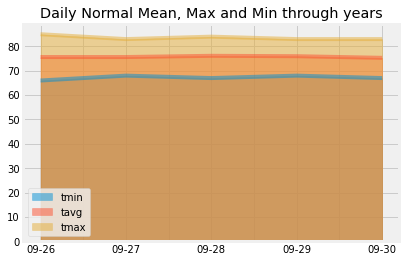

In [88]:
df.plot(kind='area', stacked=False)
plt.savefig('Area plot Temp gradients for dates all years.png')
plt.title("Daily Normal Mean, Max and Min through years")
plt.show(block=True);

